In [3]:
import tensorflow as tf 

fashion_mnist = tf.keras.datasets.fashion_mnist 

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0 

2025-01-17 11:29:33.254016: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-17 11:29:33.254595: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 11:29:33.256751: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-17 11:29:33.263252: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737080973.274837  398255 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737080973.27

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 21s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


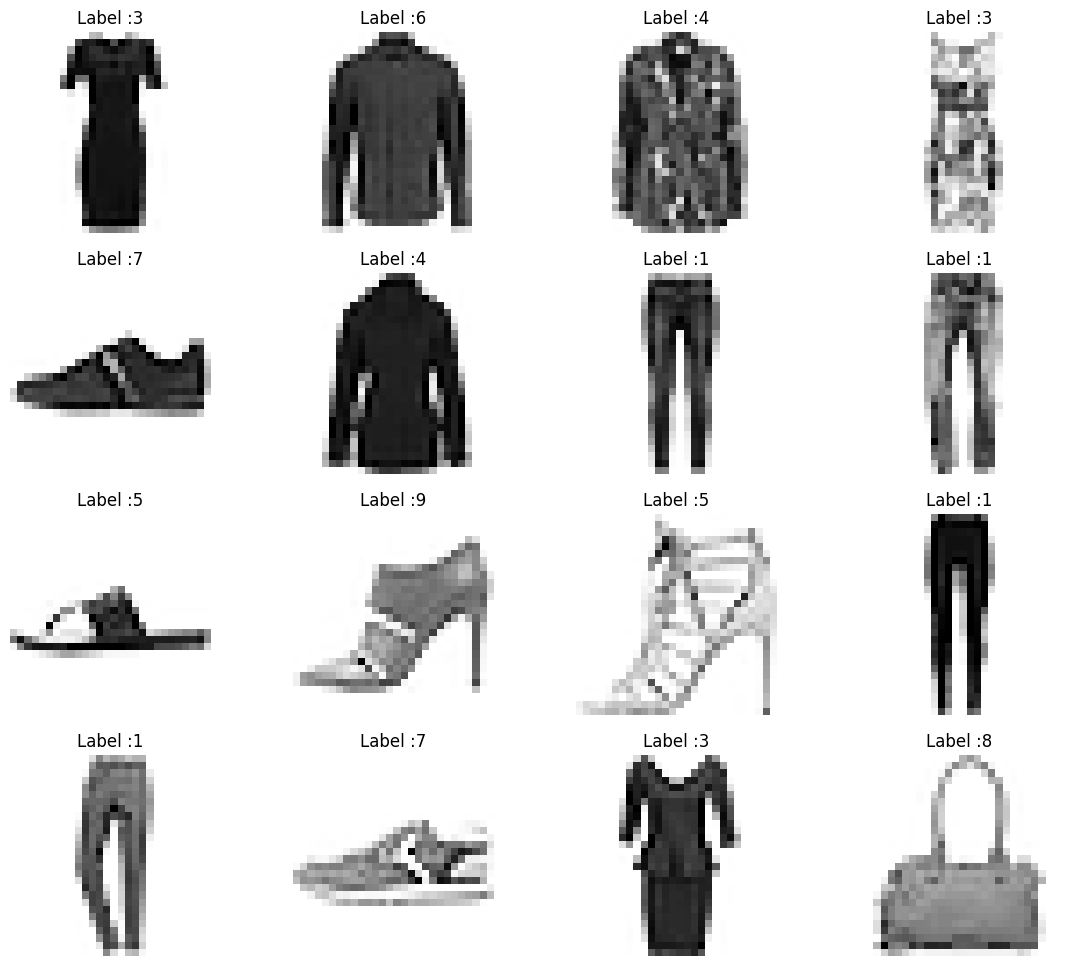

In [6]:
import random
import matplotlib.pyplot as plt 
%matplotlib inline 

samples = random.choices(population=range(0, len(y_train)), k =16)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label :' + str(y_train[n]))
    plt.axis('off')

plt.show()

### model은 이전 mnist와 동일한 구조 

In [7]:
# model을 만들어 보자면,,,
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(  
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

/home/moon/venv/eda_venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
W0000 00:00:1737082001.263249  398255 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

### 학습 fit ~ 

In [8]:
# 학습을 해보자 
import time 

start_time = time.time()
# 10번 반복해서 학습, 100개씩 나눠서 처리 -> 1번 끝까지 학습하려면 100개씩 10번 반복해야 1000 
# 결론은 10x10 총 100번 학습 
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                 epochs = 10, batch_size=100, verbose = 1) 
print ("Fit time(학습시간) : ", time.time( )- start_time)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7903 - loss: 0.6082 - val_accuracy: 0.8473 - val_loss: 0.4195
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8654 - loss: 0.3692 - val_accuracy: 0.8638 - val_loss: 0.3708
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8808 - loss: 0.3256 - val_accuracy: 0.8712 - val_loss: 0.3579
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8888 - loss: 0.3003 - val_accuracy: 0.8782 - val_loss: 0.3414
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8984 - loss: 0.2754 - val_accuracy: 0.8742 - val_loss: 0.3368
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9027 - loss: 0.2598 - val_accuracy: 0.8625 - val_loss: 0.3745
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9029 - loss: 0.2581 - val_accuracy: 0.8879 - val_loss: 0.3154
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9138 - loss: 0.2327 - val_accuracy: 0.

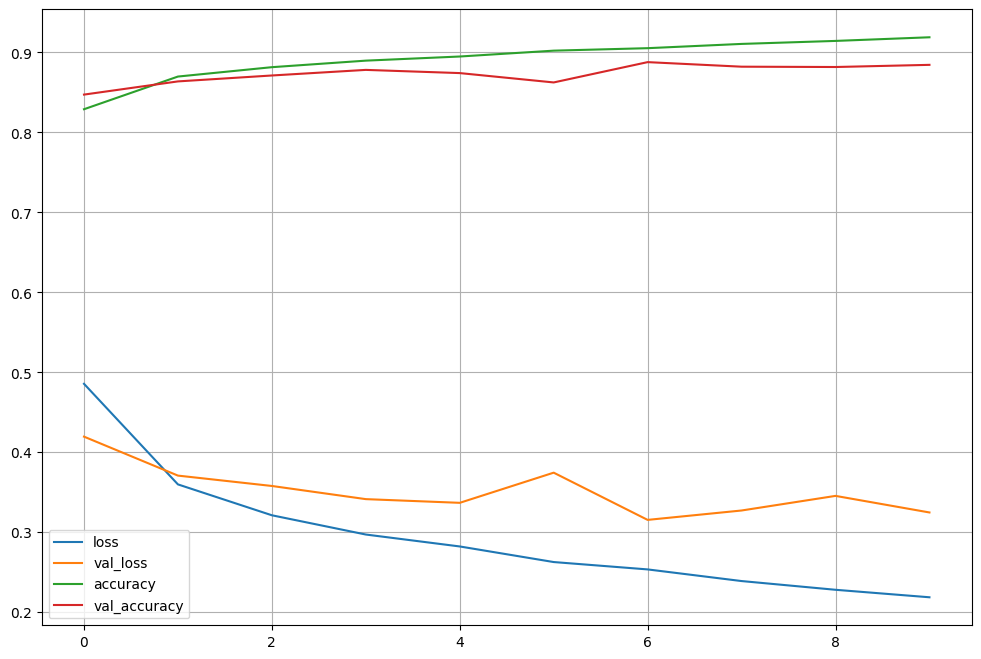

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))
for each in plot_target:
    plt.plot(hist.history[each], label=each)
plt.legend()
plt.grid()
plt.show()

##### 학습이 잘 이루어진 것처럼 보이지만, val_loss와 train_loss 사이에 간격이 발생 

In [10]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8820 - loss: 0.3323
Test loss : 0.32471898198127747
Test accuracy : 0.8845000267028809


In [11]:
import numpy as np 

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [12]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [13]:
wrong_result = []

for n in range (0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
len(wrong_result)

1155

In [14]:
import random 

samples = random.choices(population=wrong_result, k=16)
samples

[406,
 4142,
 7376,
 3953,
 4649,
 5968,
 7910,
 5006,
 9329,
 7376,
 8536,
 2506,
 9022,
 9524,
 7936,
 4058]

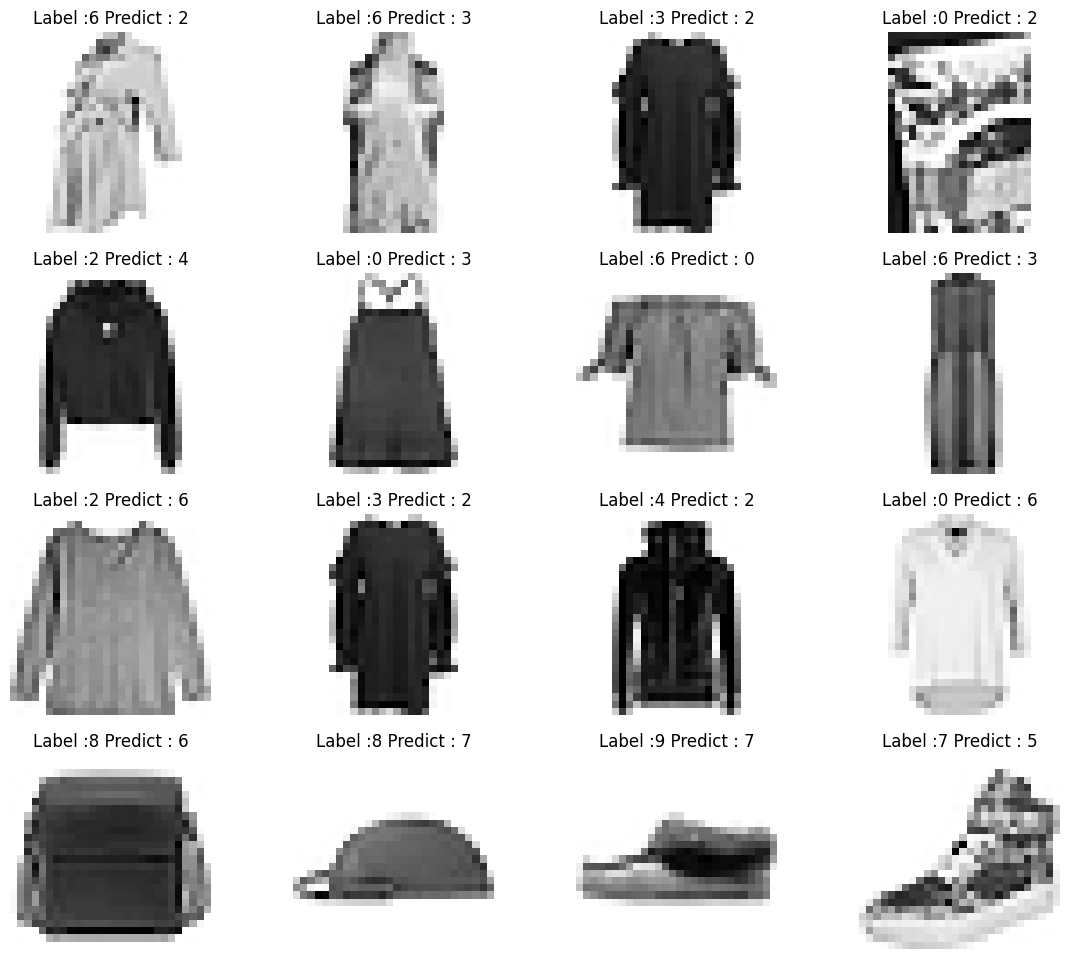

In [15]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label :' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

0 : 티셔츠
1 : 바지
2 : 스웨터
3 : 드레스
4 : 코트
5 : 샌들
6 : 셔츠
7 : 운동화
8 : 가방
9 : 부츠